In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.integrate as spi
from matplotlib import rcParams
rcParams['lines.linewidth'] = 3
rcParams['font.size'] = 26
rcParams['legend.fontsize']= 'x-large'
rcParams['axes.titlesize']= 'x-large'
rcParams['xtick.labelsize']= 'x-large'
rcParams['ytick.labelsize']= 'x-large'
rcParams['axes.labelsize']= 'x-large'
rcParams['figure.titlesize']= 'xx-large'
%matplotlib inline
#rcParams.keys()
np.set_printoptions(precision=10)
pd.set_option("display.precision", 10)

**Tarea 5**: ¡Esto pudiera (debería) funcionar! Tomemos la misma data de Solar Sunspot Number y intentemos modelar el comportamiento de estos sunspot numbers como una serie de Fourier, calculando los coeficientes de Fourier usando solo derivadas e integrales numéricas. Haga una función con un pequeño código que permita hacer esto sencillamente para un cierto orden de aproximación y hagamos una estimación del error para ese orden de aproximación. Si esto sale bien, entonces es posible (quizás) bajo una cierta tolerancia y error (por su puesto) poder predecir los futuros sunspot.!!!

La serie de Fourier de una función $f(x)$ sobre un intervalo $[0,L]$ se escribe como:
\begin{equation}
f(x)=\frac{a_0}{2}+\sum_{i=1}^{\infty}\left[a_n\cos\left(\frac{2\pi n x}{L}\right)+b_n\sin\left(\frac{2\pi n x}{L}\right)\right]
\end{equation}
donde $a_0$ $a_n$ y $b_n$ son llamados coeficientes de la expansión de la serie de Fourier
 
\begin{equation}
a_0=\frac{2}{L}\int_0^Lf(x)dx
\end{equation}
\begin{equation}
a_n=\frac{2}{L}\int_0^Lf(x)\cos\left(\frac{2\pi n x}{L}\right)dx
\end{equation}
\begin{equation}
a_n=\frac{2}{L}\int_0^Lf(x)\sin\left(\frac{2\pi n x}{L}\right)dx
\end{equation}


In [2]:
#Description of dataset in: https://wwwbis.sidc.be/silso/infosnytot
# Data available on: https://wwwbis.sidc.be/silso/datafiles
SSN=pd.read_csv("../datas/SN_y_tot_V2.0.csv",delimiter=";",names=["Year","mean","std","observations","provisional"])
SSN.tail()

,Year,mean,std,observations,provisional
316,2016.5,39.8,3.9,9940,1
317,2017.5,21.7,2.5,11444,1
318,2018.5,7.0,1.1,12611,1
319,2019.5,3.6,0.5,12884,1
320,2020.5,8.8,4.1,14440,1


In [3]:
# https://en.wikipedia.org/wiki/List_of_solar_cycles
cycles=np.array([[14,1904.6],[15,1915.8],[16,1926.4],[17,1937.4],[18,1947.5],[19,1958.3],[20,1968.11],[21,1979.12],[22,1989.11],[23,2000.11],[24,2011.4]])

In [4]:
cycles[:,0]

array([14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24.])

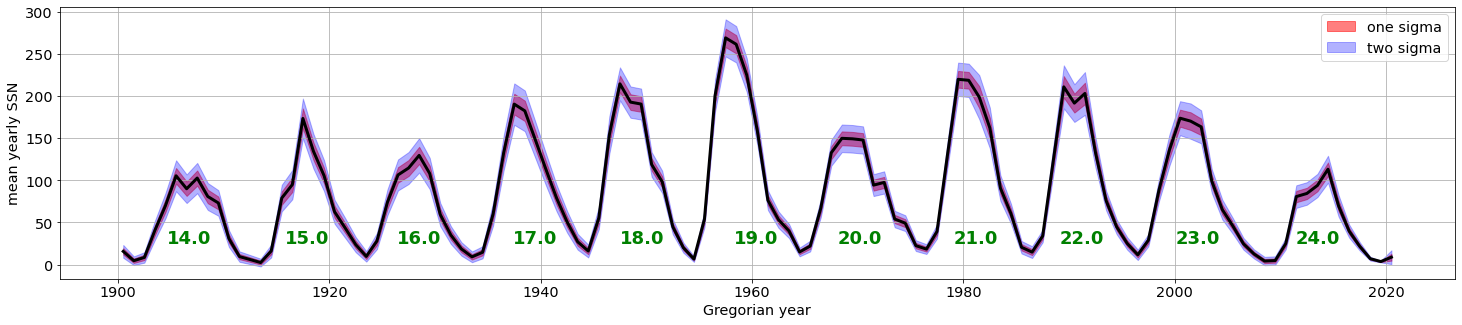

In [5]:
plt.figure(figsize=(25,5))
ii=SSN["Year"]>=1900
SSN2=SSN[ii]
plt.plot(SSN2["Year"],SSN2["mean"],color='k')
plt.fill_between(SSN2["Year"],SSN2["mean"]-SSN2["std"],SSN2["mean"]+SSN2["std"],color="red",alpha=0.5,label="one sigma")
plt.fill_between(SSN2["Year"],SSN2["mean"]-2*SSN2["std"],SSN2["mean"]+2*SSN2["std"],color="blue",alpha=0.3,label="two sigma")
for i in range(len(cycles)):
    plt.text(cycles[:,1][i],25,str(cycles[:,0][i]),fontsize=18,fontweight='bold',color='g')
plt.xlabel("Gregorian year")
plt.ylabel("mean yearly SSN")
plt.legend()
plt.grid()
plt.show()

# Interpretando con serie de Fourier. 
El modo muy simple.

In [6]:
from scipy.integrate import simps 
year,mean=np.array(SSN2["Year"]),np.array(SSN2["mean"])
x,y=year-year.min(),mean

In [7]:
x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.])

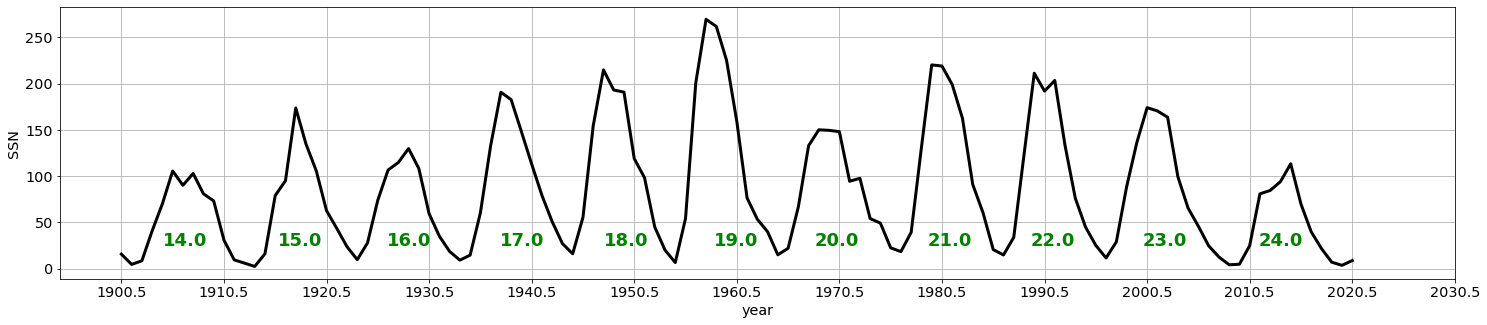

In [8]:
plt.figure(figsize=(25,5))
plt.plot(x+year.min(),y,color='k',label="Original data values")
plt.xlabel("year") 
plt.ylabel("SSN")
for i in range(len(cycles)):
    plt.text(cycles[:,1][i],25,str(cycles[:,0][i]),fontsize=18,fontweight='bold',color='g')
#plt.text(2013,25,'24',fontsize=18,fontweight='bold',color='g')
plt.grid()
plt.xticks(np.arange(year.min(),year.max()+18,10))
plt.show()

In [9]:
L=x.max()
terms=44
# Calculation of Fourier coefficients
a0=2./L*simps(y,x) 
an=lambda n:2.0/L*simps(y*np.cos(2.*np.pi*n*x/L),x) 
bn=lambda n:2.0/L*simps(y*np.sin(2.*np.pi*n*x/L),x)

In [10]:
# sum of the series 
s=a0/2.+sum([an(k)*np.cos(2.*np.pi*k*x/L)+bn(k)*np.sin(2.*np.pi*k*x/L) for k in range(1,terms+1)])

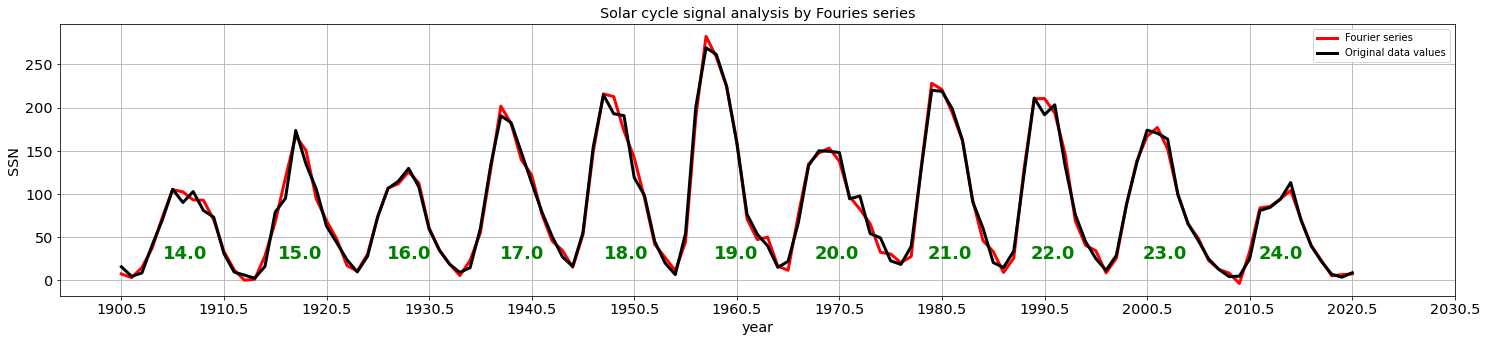

In [11]:
# Plotting 
plt.figure(figsize=(25,5))
plt.plot(x+year.min(),s,color='r',label="Fourier series") 
plt.plot(x+year.min(),y,color='k',label="Original data values") 
for i in range(len(cycles)):
    plt.text(cycles[:,1][i],25,str(cycles[:,0][i]),fontsize=18,fontweight='bold',color='g')
plt.xlabel("year") 
plt.ylabel("SSN") 
plt.legend(loc='best',prop={'size':10}) 
plt.title("Solar cycle signal analysis by Fouries series") 
plt.grid()
plt.xticks(np.arange(year.min(),year.max()+18,10))
plt.show()

In [12]:
np.sqrt(np.mean((s-mean)**2))

7.9204291263481466

In [13]:
end_pred=x.max()+15
x_pred=np.arange(x.max(),end_pred,1)
x_pred

array([120., 121., 122., 123., 124., 125., 126., 127., 128., 129., 130.,
       131., 132., 133., 134.])

In [14]:
s_pred=a0/2.+sum([an(k)*np.cos(2.*np.pi*k*x_pred/L)+bn(k)*np.sin(2.*np.pi*k*x_pred/L) for k in range(1,terms+1)])

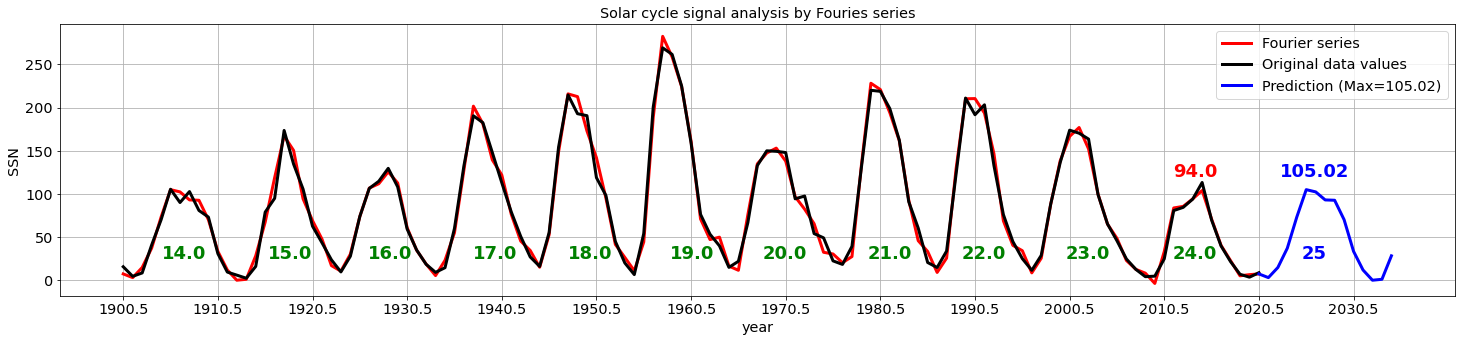

In [15]:
# Plotting 
plt.figure(figsize=(25,5))
plt.plot(x+year.min(),s,color='r',label="Fourier series") 
plt.plot(x+year.min(),y,color='k',label="Original data values") 
plt.plot(x_pred+year.min(),s_pred,color='b',label="Prediction (Max={})".format(round(s_pred.max(),2)))
for i in range(len(cycles)):
    plt.text(cycles[:,1][i],25,str(cycles[:,0][i]),fontsize=18,fontweight='bold',color='g')
plt.text(2025,25,"25",fontsize=18,fontweight='bold',color='b')
cs24=SSN2[(SSN2["Year"]>2008)&(SSN2["Year"]<2014)]["mean"].max()
plt.text(2011.4,120,str(cs24),fontsize=18,fontweight='bold',color='r')
plt.text(2022.7,120,str(round(s_pred.max(),2)),fontsize=18,fontweight='bold',color='b')
plt.xlabel("year") 
plt.ylabel("SSN") 
plt.legend(loc='best') 
plt.title("Solar cycle signal analysis by Fouries series") 
plt.grid()
plt.xticks(np.arange(year.min(),year.max()+18,10))
plt.show()

Ok, funciona. Ahora automatizando....

In [16]:
def makeFourier(Nt):
    L=x.max()
    terms=Nt
    # Calculation of Fourier coefficients
    a0=2./L*simps(y,x) 
    an=lambda n:2.0/L*simps(y*np.cos(2.*np.pi*n*x/L),x) 
    bn=lambda n:2.0/L*simps(y*np.sin(2.*np.pi*n*x/L),x)
    # sum of the series 
    s=a0/2.+sum([an(k)*np.cos(2.*np.pi*k*x/L)+bn(k)*np.sin(2.*np.pi*k*x/L) for k in range(1,terms+1)])
    end_pred=x.max()+14
    x_pred=np.arange(x.max(),end_pred,1)
    s_pred=a0/2.+sum([an(k)*np.cos(2.*np.pi*k*x_pred/L)+bn(k)*np.sin(2.*np.pi*k*x_pred/L) for k in range(1,terms+1)])
    error=np.sqrt(np.mean((s-mean)**2))
    return error

In [17]:
terminos=np.arange(5,50+1,1)

In [18]:
ERROR=[]
for i in terminos:
    ERROR.append(makeFourier(i))
ERROR=np.array(ERROR)

In [19]:
terminos,ERROR

(array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
        39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 array([61.3089243767, 60.9446589303, 60.8923057185, 60.7220931449,
        60.0357213637, 58.4531020134, 37.599662406 , 21.3906193023,
        19.7716623737, 18.0570882607, 15.3816942409, 15.2532655895,
        15.0425613128, 15.0140933985, 14.6664265227, 14.5715955257,
        14.0719223329, 12.9538831538, 10.7390299701, 10.4822540784,
         9.8408056015,  9.6126656722,  9.4575782627,  9.3050774784,
         9.2068707649,  9.2016177669,  8.9725673928,  8.9643772981,
         8.941288597 ,  8.6020965781,  8.5582826777,  8.54478889  ,
         8.2675031995,  8.086445837 ,  8.1787735719,  8.1895054004,
         8.123423855 ,  7.9653304506,  7.997985763 ,  7.9204291263,
         8.4182661676,  8.7044930085,  9.0570766539, 13.6056449963,
        20.1509141089, 20.592666143 ]))

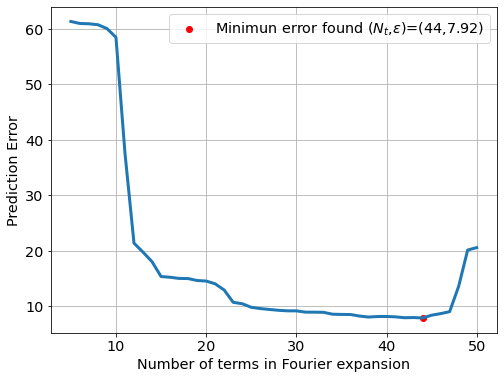

In [20]:
plt.figure(figsize=(8,6))
plt.plot(terminos,ERROR)
plt.scatter(terminos[ERROR==ERROR.min()],ERROR.min(),color='r',label=r"Minimun error found ($N_t$,$\epsilon$)=({},{})".format(terminos[ERROR==ERROR.min()][0],round(ERROR.min(),2)))
plt.xlabel("Number of terms in Fourier expansion")
plt.ylabel("Prediction Error")
plt.legend()
plt.grid()
plt.show()

Para comparar...! Mirar aquí: https://www.swpc.noaa.gov/products/solar-cycle-progression

<img width="49%" src="../figures/solarcicle24_2.png"/>  <img width="49%" src="../figures/solarcicle24_1.png"/> 

 **Tarea 2**: Vamos a probar algo. Quisiera ver si es posible modelar esta serie temporal a través de una expansión ortogonal polinomial. Así, dada una función continuua $f(x)$, entonces sabemos que 
    \begin{equation}
    f_n(x)=\sum_{\ell =0}^{n}a_{\ell}P_{\ell}(x)
    \end{equation}
    donde $f_n(x)$ converge a la media de $f(x)$ en $n\to \infty$, sabiendo que
    \begin{equation}
    a_{\ell }={\frac{2\ell +1}{2}}\int _{-1}^{1}f(x)P_{\ell }(x)dx
    \end{equation}
    Una expresión especialmente compacta para los polinomios de Legendre viene dada por la fórmula de Rodrigues: 
    \begin{equation}
    P_{n}(x)={\frac {1}{2^{n}n!}}{\frac {d^{n}}{dx^{n}}}(x^{2}-1)^{n}
    \end{equation}

    Entonces, nos gustaría saber si esta aproximación es buena para este problema de modelar los ciclos solares con alguna tolerancia. Los datos están en `datas/SN_y_tot_V2.0.csv`. Si esto sale bien, entonces es posible (quizás) bajo una cierta tolerancia y error (por su puesto) poder predecir los futuros sunspot.!!!

In [38]:
from scipy.misc import derivative
from scipy.special import eval_legendre
def makeOrtogonal(Nt):
    terms=Nt
    
    # Calculation of Fourier coefficients
    an=lambda n:(2*n+1)/2*simps(y*(eval_legendre(n,x)),x) 

    # sum of the series 
    s=sum([an(k)*(eval_legendre(k,x)) for k in range(1,terms+1)])
    end_pred=x.max()+14
    x_pred=np.arange(x.max(),end_pred,1)
    s_pred=a0/2.+sum([an(k)*np.cos(2.*np.pi*k*x_pred/L)+bn(k)*np.sin(2.*np.pi*k*x_pred/L) for k in range(1,terms+1)])
    error=np.sqrt(np.mean((s-mean)**2))
    return error

In [47]:
makeOrtogonal(400)

<ipython-input-38-30d8cdc50c50>:10: RuntimeWarning: overflow encountered in multiply
  s=sum([an(k)*(eval_legendre(k,x)) for k in range(1,terms+1)])
<ipython-input-38-30d8cdc50c50>:7: RuntimeWarning: overflow encountered in double_scalars
  an=lambda n:(2*n+1)/2*simps(y*(eval_legendre(n,x)),x)
<ipython-input-38-30d8cdc50c50>:10: RuntimeWarning: invalid value encountered in multiply
  s=sum([an(k)*(eval_legendre(k,x)) for k in range(1,terms+1)])
<ipython-input-38-30d8cdc50c50>:7: RuntimeWarning: overflow encountered in multiply
  an=lambda n:(2*n+1)/2*simps(y*(eval_legendre(n,x)),x)
/usr/local/lib/python3.8/dist-packages/scipy/integrate/_quadrature.py:374: RuntimeWarning: overflow encountered in multiply
  y[slice1]*hsum*hsum/hprod +
/usr/local/lib/python3.8/dist-packages/scipy/integrate/_quadrature.py:373: RuntimeWarning: overflow encountered in add
  tmp = hsum/6.0 * (y[slice0]*(2-1.0/h0divh1) +
<ipython-input-38-30d8cdc50c50>:13: RuntimeWarning: invalid value encountered in add
  s_p

nan